In [3]:
import community
import pandas as pd
from pandas import DataFrame as df
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import collections

# Ignore matplotlib warnings
import warnings
from scipy.sparse import (spdiags, SparseEfficiencyWarning, csc_matrix,
    csr_matrix, isspmatrix, dok_matrix, lil_matrix, bsr_matrix)
warnings.simplefilter('ignore',SparseEfficiencyWarning)
data = pd.read_csv("visualisasi_books.csv")

In [4]:
def pembangkitan(g):
    pop_size = max(g.nodes())
    pembangkitan = []

    while len(pembangkitan) <= pop_size:
        a = round(np.random.uniform(low=min(g.nodes()), high=pop_size))
        if a not in pembangkitan:
            pembangkitan.append(a)
    return pembangkitan

def merge(lsts):
    sets = [set(lst) for lst in lsts if lst]
    merged = True
    while merged:
        merged = False
        results = []
        while sets:
            common, rest = sets[0], sets[1:]
            sets = []
            for x in rest:
                if x.isdisjoint(common):
                    sets.append(x)
                else:
                    merged = True
                    common |= x
            results.append(common)
        sets = results
    return sets

def comm(G, pembangkitan, node):
    mrg = []
    for index, i in enumerate(pembangkitan):
        temp = []
        for j in [ u for u in G.neighbors(i)]:
            temp.append(j)
        temp.append(i)
        mrg.append(set(temp))
    mrg = list(set(map(tuple, mrg)))
    mrg.sort(key=len, reverse = True)

    final = merge(mrg)

    for i in range(len(final)):
        lc = dict()
        for j in final[i]:
            lc[j] = (G.degree(j)/(100/50))
        final[i] = lc
        
    for i in range(len(final)):
        for k,v in final[i].items():
            if node in final[i].keys():
                return i
            
def lc(G, pembangkitan, node):
    mrg = []
    for index, i in enumerate(pembangkitan):
        temp = []
        for j in [ u for u in G.neighbors(i)]:
            temp.append(j)
        temp.append(i)
        mrg.append(set(temp))
    mrg = list(set(map(tuple, mrg)))
    mrg.sort(key=len, reverse = True)

    final = merge(mrg)

    for i in range(len(final)):
        lc = dict()
        for j in final[i]:
            lc[j] = (G.degree(j)/(100/50))
        final[i] = lc
        
    for i in range(len(final)):
        for k,v in final[i].items():
            if node in final[i].keys():
                return int(sum(final[i].values()))

def Q_xi(G, pembangkitan):
    tabel = dict()
    for index, node in enumerate(pembangkitan):
        try:
            tabel[index] = [node, G.degree(node), 
                    G.number_of_edges(), 
                    lc(G, pembangkitan, node), 
                    lc(G, pembangkitan, node)*2, 
                    comm(G, pembangkitan, node),
                    (lc(G, pembangkitan, node)/G.number_of_edges())-((lc(G, pembangkitan, node)*2)/(2*G.number_of_edges()))**(2)]
        except ZeroDivisionError:
            tabel[index] = [node, G.degree(node), 
                    G.number_of_edges(), 
                    lc(G, pembangkitan, node), 
                    lc(G, pembangkitan, node)*2, 
                    comm(G, pembangkitan, node),
                    0]
        
    return tabel

def Qbest(G, pembangkitan):
    tabel = Q_xi(G, pembangkitan)
    max_com = [0]
    for i in range(len(tabel)):
        max_com.append((tabel[i])[5])

    Q = dict()    
    for i in range(max(max_com)+1):
        Qi = dict()
        for j in range(len(tabel)):
            if (tabel[j])[5] == i:
                Qi[j] = (tabel[j])[6]
        try:
            Q[i] = sum(Qi.values())/len(Qi)
        except ZeroDivisionError:
            Q[i] = 0
        
    return sum(Q.values())

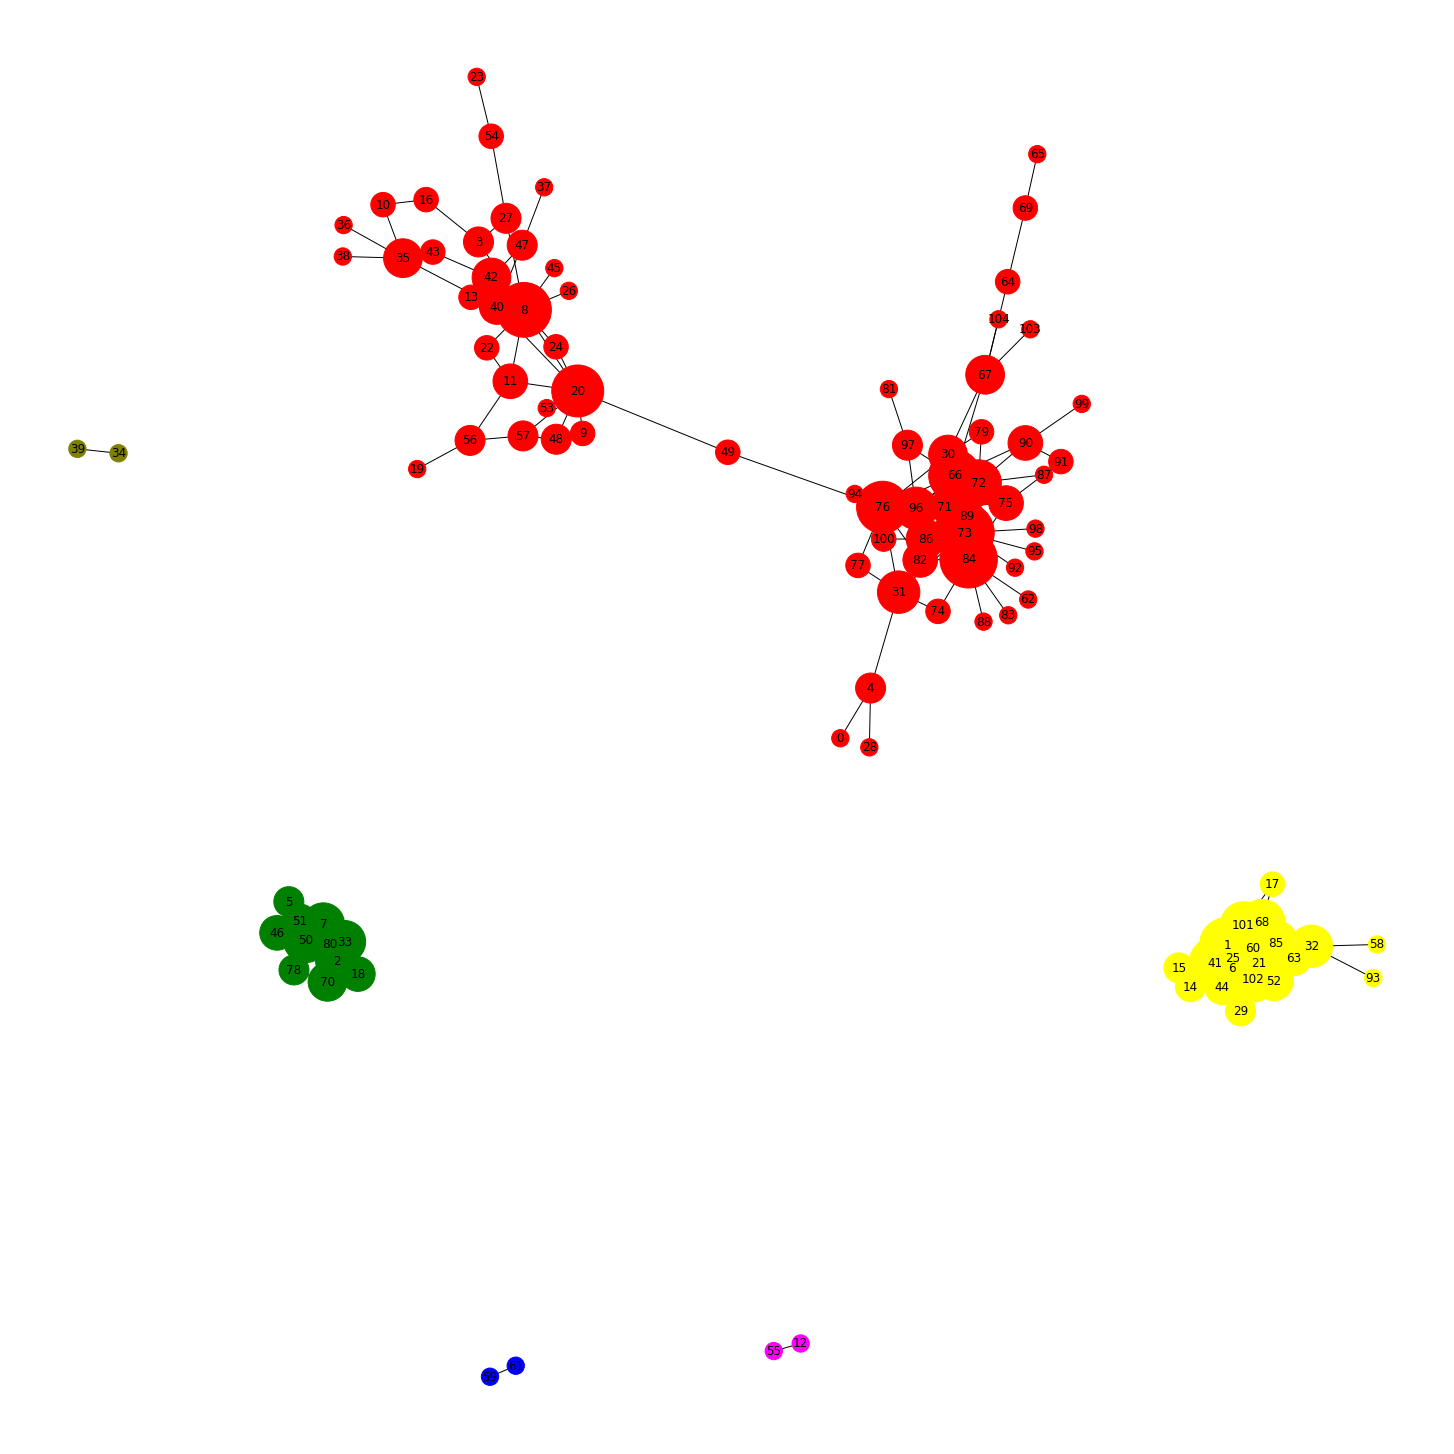

In [7]:
g = nx.from_pandas_edgelist(data, source='source', target='target', edge_attr=None)
d = dict(g.degree)
community = dict()
for i in g.nodes():
    color = ["#FF0000","#FFFF00","#008000","#0000FF","#FF00FF","#808000","#00FF00","#00FFFF","#800000","#800080"]
    community[i] = color[comm(g, pembangkitan(g), i)]
plt.figure(300,figsize=(20,20))
nx.draw_spring(g, with_labels = True, node_size=[v * 300 for v in d.values()], node_color=community.values())
plt.savefig('books.svg')

In [8]:
for i in g.nodes():
    print(i, comm(g, pembangkitan(g), i))

1 1
41 1
68 1
32 1
14 1
44 1
101 1
60 1
15 1
21 1
102 1
0 0
4 0
2 2
80 2
33 2
18 2
70 2
50 2
7 2
3 0
27 0
16 0
8 0
28 0
31 0
5 2
46 2
6 1
29 1
85 1
78 2
51 2
24 0
13 0
11 0
26 0
22 0
45 0
20 0
42 0
9 0
48 0
10 0
35 0
56 0
12 4
55 4
17 1
19 0
57 0
40 0
53 0
49 0
25 1
52 1
63 1
23 0
54 0
30 0
66 0
79 0
67 0
76 0
73 0
74 0
77 0
82 0
58 1
93 1
38 0
36 0
43 0
34 5
39 5
37 0
47 0
59 3
61 3
62 0
84 0
64 0
69 0
65 0
89 0
96 0
97 0
90 0
103 0
104 0
71 0
75 0
72 0
87 0
92 0
98 0
86 0
95 0
91 0
81 0
83 0
88 0
100 0
99 0
94 0


In [9]:
books = [[0,4,3,27,16,8,28,31,24,13,11,26,22,45,20,42,9,48,10,35,56,19,57,40,53,49,23,54,30,66,79,67,76,73,74,77,82,38,36,43,37,47,62,84,64,69,65,89,96,97,90,103,104,71,75,72,87,92,98,86,95,91,81,83,88,100,99,94],[1,41,68,32,14,44,101,60,15,21,102,6,29,85,17,25,52,63,58,93],[2,80,33,18,70,50,7,5,46,78,51],[59,61],[12,55],[34,39]]
g = nx.from_pandas_edgelist(data, source='source', target='target', edge_attr=None)
nx.algorithms.community.quality.modularity(g,books)

0.5892332241538571

In [5]:
g = nx.from_pandas_edgelist(data, source='source', target='target', edge_attr=None)

print(Q_xi(g,pembangkitan(g)))

{0: [50, 7, 189, 27, 54, 2, 0.12244897959183673], 1: [7, 6, 189, 27, 54, 2, 0.12244897959183673], 2: [20, 9, 189, 105, 210, 0, 0.24691358024691357], 3: [98, 1, 189, 105, 210, 0, 0.24691358024691357], 4: [103, 1, 189, 105, 210, 0, 0.24691358024691357], 5: [64, 2, 189, 105, 210, 0, 0.24691358024691357], 6: [29, 3, 189, 54, 108, 1, 0.20408163265306123], 7: [48, 3, 189, 105, 210, 0, 0.24691358024691357], 8: [30, 5, 189, 105, 210, 0, 0.24691358024691357], 9: [70, 5, 189, 27, 54, 2, 0.12244897959183673], 10: [76, 9, 189, 105, 210, 0, 0.24691358024691357], 11: [92, 1, 189, 105, 210, 0, 0.24691358024691357], 12: [31, 6, 189, 105, 210, 0, 0.24691358024691357], 13: [17, 2, 189, 54, 108, 1, 0.20408163265306123], 14: [58, 1, 189, 54, 108, 1, 0.20408163265306123], 15: [67, 5, 189, 105, 210, 0, 0.24691358024691357], 16: [99, 1, 189, 105, 210, 0, 0.24691358024691357], 17: [12, 1, 189, 1, 2, 4, 0.005263010554015845], 18: [71, 3, 189, 105, 210, 0, 0.24691358024691357], 19: [53, 1, 189, 105, 210, 0, 0.2

In [6]:
print(Qbest(g,pembangkitan(g)))

0.5892332241538586
